**Import the required libraries**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random # to introduce randomness in selection
import statistics
from scipy import stats # Library for statistical calculations
import warnings
warnings.filterwarnings("ignore")

**Q1)a) Compute the mean,median, mode, variance, standard deviation and IQR  for the following data set. 
b)Also find the z-score for the score 87.How many standard deviations is it away from the mean**
- Weight in pounds = [51, 68, 83, 93, 89, 58, 79, 54, 60, 77, 87, 57, 63, 85, 92, 74, 67, 88, 91, 82]

In [8]:
stats.binom.cdf(3,5,0.5)

0.31249999999999994

In [49]:
#Sample Data
weights = [51, 68, 83, 93, 89, 58, 79, 54, 60, 77, 87, 57, 63, 85, 92, 74, 67, 88, 91, 82]
mean = np.mean(weights)
median = np.median(weights)
mode = stats.mode(weights)[0]                  

q1=  np.quantile(weights, 0.25)
q3=  np.quantile(weights, 0.75)
iqr=q3-q1

variance = np.var(weights)
std = np.std(weights)
zscore = (87-mean)/std

print("Mean:",mean )
print("Median:",median)
print("Mode:", mode)
print("IQR:",iqr)
print("Variance:", round(variance,2))
print("Standard Deviation:", round(std,2))
print("Z Score", round(zscore,2))

print("The Value 87 is 0.89 Standard Deviation above the mean")

Mean: 74.9
Median: 78.0
Mode: 51
IQR: 25.0
Variance: 186.19
Standard Deviation: 13.65
Z Score 0.89
The Value 87 is 0.89 Standard Deviation above the mean


**Q2). Upload the data sales.csv. Consider the following output file of sales data 
Based on the data and using coefficient of variation, order the high to low in terms of coefficient of variation value (Do not consider outlet establishment year for calculation)**

In [50]:
#Load and view data
df = pd.read_csv('sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [59]:
#Check missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   749
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [51]:
df.columns
df_1=df.drop(columns=['Outlet_Establishment_Year'])

std = df_1[df_1.select_dtypes(exclude='O').columns].std()
mean = df_1[df_1.select_dtypes(exclude='O').columns].mean()
cv = std/mean
print(cv.sort_values(ascending=False))

Item_Outlet_Sales    0.782335
Item_Visibility      0.780224
Item_Weight          0.494732
Item_MRP             0.441550
Profit               0.126866
dtype: float64


**Consider the sales data in file sales.csv**

**i) Provide a summary statistic of the data for both categorical and nominal variables, mention which variable has highest and lowest variability** 

In [52]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7774.0,11.676740,5.776851,0.00,7.720000,11.800000,16.500000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.00,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.998838,62.258099,31.30,93.800000,142.700000,185.650000,266.900000
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.00,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.29,834.247400,1794.331000,3101.296400,13086.964800
Profit,8523.0,13.414514,1.701840,0.10,13.150000,13.900000,14.300000,24.000000


Based on Standard Deviation highest variability is for Item_Outlet_Sales 7 lowest for Item_Visibility

In [53]:
#Summary Statistics for categorical variables
df.describe(include='O').T

,count,unique,top,freq
Item_Identifier,8523,1559,FDW13,10
Item_Fat_Content,8523,5,Low Fat,5089
Item_Type,8523,16,Fruits and Vegetables,1232
Outlet_Identifier,8523,10,OUT027,935
Outlet_Size,6113,3,Medium,2793
Outlet_Location_Type,6473,8,Tier 2,2793
Outlet_Type,8523,4,Supermarket Type1,5577


**ii)Plot a histogram and box plot of both sales and profit, based on the plots what would you say about skewness and kurtosis**

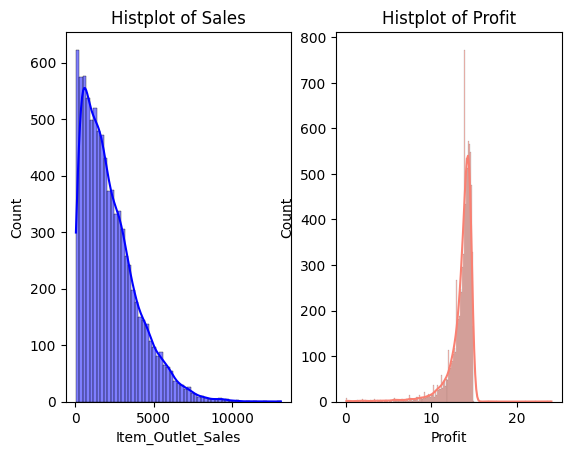

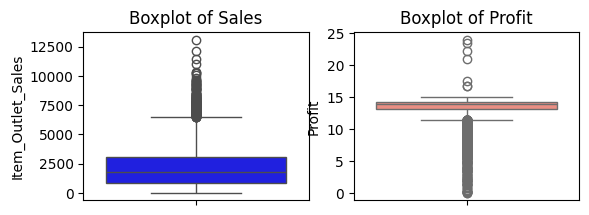

In [54]:
plt.subplot(1,2,1)
sns.histplot(df['Item_Outlet_Sales'], color='blue', kde=True)
plt.title("Histplot of Sales")
plt.subplot(1,2,2)
sns.histplot(df['Profit'], color='salmon', kde=True)
plt.title("Histplot of Profit")
plt.show()

plt.subplot(2,2,1)
sns.boxplot(y=df['Item_Outlet_Sales'], color='blue')
plt.title("Boxplot of Sales")
plt.subplot(2,2,2)
sns.boxplot(y=df['Profit'], color='salmon')
plt.title("Boxplot of Profit")
plt.show()

Sales is higly right skewed and Profit is higly left skewed

**iii)Provide a correlation matrix and scatter plot of all the numerical variables, based on both, which variables is highly correlated and which are not**

In [55]:
corr = df[df.select_dtypes(exclude='O').columns].corr()
print("Correlation:",corr)


Correlation:                            Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.055081  0.020616   
Item_Visibility              -0.055081         1.000000 -0.001597   
Item_MRP                      0.020616        -0.001597  1.000000   
Outlet_Establishment_Year     0.365815        -0.074834  0.005046   
Item_Outlet_Sales            -0.034997        -0.128625  0.567555   
Profit                       -0.016058         0.014269  0.004109   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                 0.365815          -0.034997   
Item_Visibility                            -0.074834          -0.128625   
Item_MRP                                    0.005046           0.567555   
Outlet_Establishment_Year                   1.000000          -0.049135   
Item_Outlet_Sales                          -0.049135           1.000000   
Profit                                     -0.019674 

Item Outlet Sales and MRP are moderately highly correalted positively.

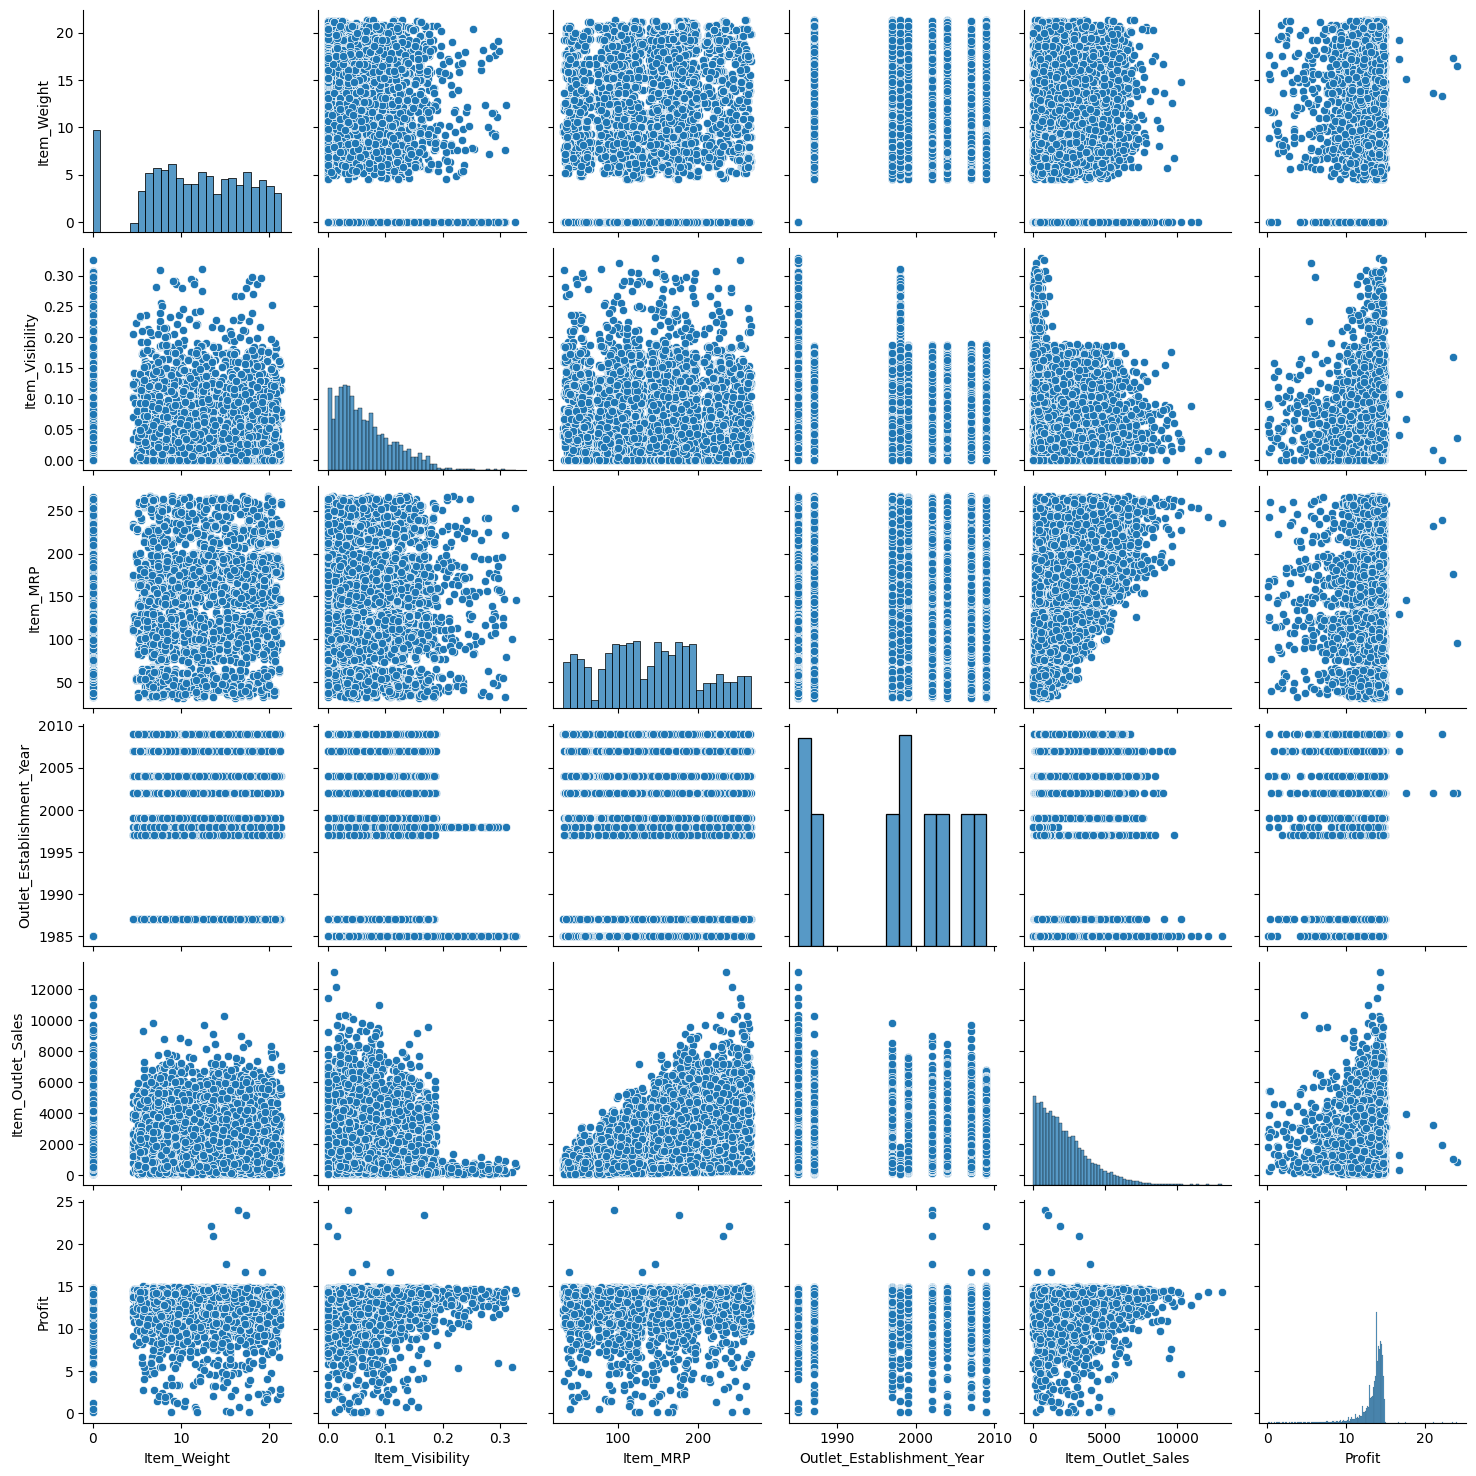

In [56]:
#Create all scatter plots
sns.pairplot(data=df)
plt.show()

**iv)Provide a histogram based for sales based on two groups of item fat content ( Low fat and Regular), what do you observe, would you prefer conducting an hypothesis test for this.**

In [39]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [58]:
d={'Low Fat':'Low Fat', 'low fat': 'Low Fat' , 'LF': 'Low Fat', 'lf': 'Low Fat', 'reg': 'Regular', 'Regular': 'Regular' }
df['Item_Fat_Content'] = df['Item_Fat_Content'].map(d)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [63]:
df_low = df[df['Item_Fat_Content']=='Low Fat']
df_reg = df[df['Item_Fat_Content']=='Regular']
df_high = df[df['Item_Fat_Content']=='High Fat']

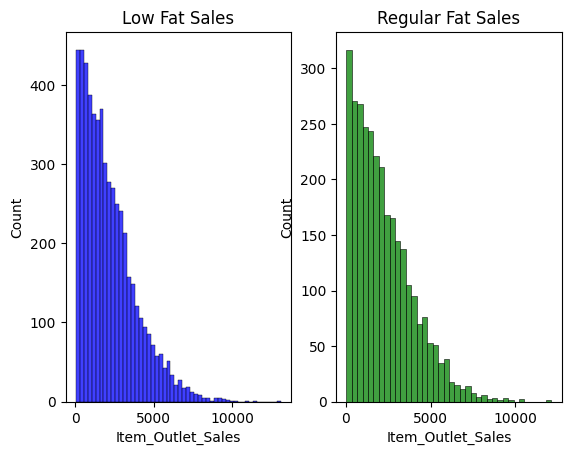

In [69]:
plt.subplot(1,2,1)
sns.histplot(df_low["Item_Outlet_Sales"], color='Blue')
plt.title("Low Fat Sales")

plt.subplot(1,2,2)
sns.histplot(df_reg["Item_Outlet_Sales"], color='Green')
plt.title("Regular Fat Sales")
plt.show()




In [37]:
df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()


Item_Fat_Content
LF         2073.551928
Low Fat    2164.477336
Regular    2235.186702
low fat    2087.740737
reg        1962.192268
Name: Item_Outlet_Sales, dtype: float64

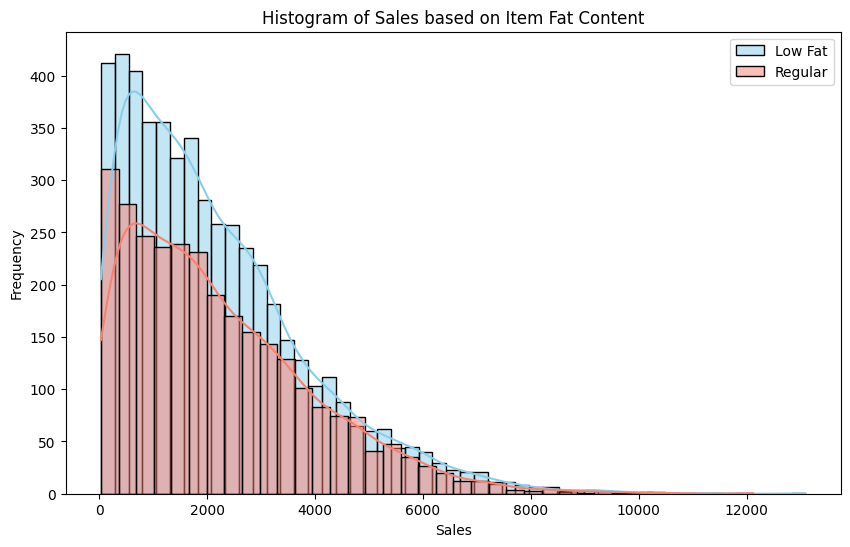

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your pandas DataFrame with 'sales' and 'item_fat_content' columns

# Filter data for Low Fat and Regular items
low_fat_sales = df[df['Item_Fat_Content'] == 'Low Fat']['Item_Outlet_Sales']
regular_sales = df[df['Item_Fat_Content'] == 'Regular']['Item_Outlet_Sales']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(low_fat_sales, color='skyblue', label='Low Fat', kde=True)
sns.histplot(regular_sales, color='salmon', label='Regular', kde=True)
plt.title('Histogram of Sales based on Item Fat Content')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Probability

**1. Three cards are drawn from an ordinary deck and not replaced. Find the probability of
these events.
a. Getting 3 jacks
b. Getting an ace, a king, and a queen in order
c. Getting a club, a spade, and a heart in order
d. Getting 3 clubs**

In [72]:
print("prob_3_jacks =",(4/52)*(3/51)*(2/50))
print("prob_ace_king_queen =",(4/52)*(4/51)*(4/50))
print("prob_club_spade_heart=",(13/52)*(13/51)*(13/50))
print("prob_3_clubs=",(13/52)*(12/51)*(11/50))


prob_3_jacks = 0.0001809954751131222
prob_ace_king_queen = 0.00048265460030165913
prob_club_spade_heart= 0.01656862745098039
prob_3_clubs= 0.012941176470588235


**2. An urn contains 3 red balls, 2 blue balls, and 5 white balls. A ball is selected and its
color noted. Then it is replaced. A second ball is selected and its color noted. Find the
probability of each of getting both white balls.**

In [77]:
pballwhite = (5/10)*(5/10)

#since draws are with replacement implies independence 
print("Probability of White Ball:",pballwhite)




0.25


#### 3. A kitchen set contains 10 knives, 3 of which are defective. Two knives are drawn at random with replacement. What is the probability that none of the two knives will be defective?

In [78]:
num_def_knives = 3
num_non_def_knives = 7

#since draws are with replacement implies independence 
prob_both_non_def_knives = (7/10) *(7/10)

print("Probability of both non defective knives:",prob_both_non_def_knives)


0.48999999999999994


#### 4. The new vaccine is to be tested on patients. There are 5 diabetic patients (have the same type of diabetes), 9 patients with a similar heart condition and 11 patients with the same liver condition. One patient is randomly chosen. What is the probability that the patient is not diabetic?

In [80]:
prob_dibetic = (5/25)

prob_non_diabetic= 1-prob_dibetic

print("Probability of non diabetic patient:",prob_non_diabetic)

0.8


### Odds

Probability can also be expressed in terms of `odds`. Odds is the ratio of the number of observations in favor of an event to the number of observations not in favor of an event. If odds in favor of event A are a:b then $P(A) = \frac{a}{a+b}$

#### 5. The odds that a New Yorker picked at random will be either overweight or obese are 14:11. What is the probability that the person is fit (is not overweight or obese)?

In [81]:
num_fit=11
num_total=14+11
prob_fit=num_fit/num_total
print("Probability Fit Person:", prob_fit)

Probability Fit 0.44


**6) A particular issue has been raised by the female employee in a particular company stating that there is favoritism for male employees for promotion. The validation given by the management is that the proportion of females employed is less in comparison and hence favoritism cannot be justified. The following data had been provided by the management to prove the justification**

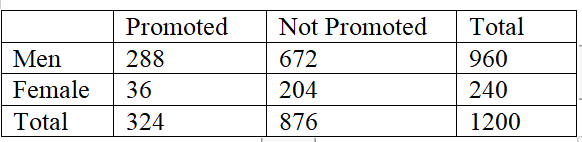

- i) Determine the P (Men Promoted)
- ii) Determine the P (Female Promoted)
- iii) Determine P (Promotion given it is male)
- iv) Determine P (Promotion given it is female)
- v) Would you agree with the management, if you agree or disagree how would you argue upon the case by using conditional probability concepts?


In [85]:
prob_male_promoted = 288/1200
prob_female_promoted = 36/1200
prob_promotion_given_male = 288/960
prob_promotion_given_female = 36/240

print("Probability of male promoted:", prob_male_promoted)
print("Probability of female promoted:",prob_female_promoted)
print("Probability of promotion given gender male:", prob_promotion_given_male)
print("Probability of promotion given gender is female:",prob_promotion_given_female)

prob_male_promoted 0.24
prob_female_promoted 0.03
prob_promotion_given_male 0.3
prob_promotion_given_female 0.15


**7. A Maintenance firm has gathered the following information regarding the failure mechanism for air conditioning.  Find the probability** 
- a)That failure involves a gas leak, 

- b)That there is evidence of electrical failure given that there was gas leak
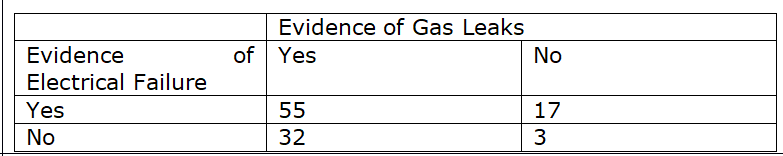

In [1]:
scipy.stats.binomial.pmf()


NameError: name 'scipy' is not defined

In [86]:
n = 55+17+32+3
prob_failure_gas_leak = (55+32)/n
prob_electrical_failure_given_gas_leak = 55/(55+32)
print("Probabilty of Electric failure give gas failure:", prob_electrical_failure_given_gas_leak)

Probabilty of Electric failure give gas failure 0.632183908045977


# END 